In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
import missingno as msno 
%matplotlib inline 

# read in the dataset into a DataFrame
chocolate_df =pd.read_csv('chocolate.csv')

# view the DataFrame
chocolate_df.head()

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,DBN,Durban,IE,Ireland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,Imports,CTN,Cape Town,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA


In [2]:
# View the shape of the DataFrame
chocolate_df.shape

(1000, 17)

In [3]:
# View the summary statistics of chocolate_df
chocolate_df.describe()

,tariff,transportcode,yearmonth,calendaryear,statisticalquantity,customsvalue
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,18062010.0,1.707000,201237.516000,2012.311000,11982.813820,4.595701e+05
std,0.0,1.466049,161.509006,1.620156,30331.838152,1.193868e+06
min,18062010.0,0.000000,201001.000000,2010.000000,0.010000,2.000000e+00
25%,18062010.0,1.000000,201107.000000,2011.000000,59.625000,3.317000e+03
50%,18062010.0,1.000000,201210.000000,2012.000000,1049.750000,4.507850e+04
75%,18062010.0,3.000000,201402.000000,2014.000000,7053.775000,2.824558e+05
max,18062010.0,4.000000,201508.000000,2015.000000,253600.000000,1.208207e+07


In [4]:
# View the dtypes in each column
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradetype                 1000 non-null   object 
 1   districtofficecode        1000 non-null   object 
 2   districtofficename        1000 non-null   object 
 3   countryoforigin           989 non-null    object 
 4   countryoforiginname       1000 non-null   object 
 5   countryofdestination      1000 non-null   object 
 6   countryofdestinationname  1000 non-null   object 
 7   tariff                    1000 non-null   int64  
 8   statisticalunit           1000 non-null   object 
 9   transportcode             1000 non-null   int64  
 10  transportcodedescription  1000 non-null   object 
 11  yearmonth                 1000 non-null   int64  
 12  calendaryear              1000 non-null   int64  
 13  tariffanddescription      1000 non-null   object 
 14  statistic

In [5]:
# convert the dtype of yearmonth from int64 to datetime
chocolate_df['yearmonth'] = pd.to_datetime(chocolate_df['yearmonth'], format = '%Y%m')

# view the dtype
chocolate_df.info()

# view the yearmonth column
chocolate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tradetype                 1000 non-null   object        
 1   districtofficecode        1000 non-null   object        
 2   districtofficename        1000 non-null   object        
 3   countryoforigin           989 non-null    object        
 4   countryoforiginname       1000 non-null   object        
 5   countryofdestination      1000 non-null   object        
 6   countryofdestinationname  1000 non-null   object        
 7   tariff                    1000 non-null   int64         
 8   statisticalunit           1000 non-null   object        
 9   transportcode             1000 non-null   int64         
 10  transportcodedescription  1000 non-null   object        
 11  yearmonth                 1000 non-null   datetime64[ns]
 12  calendaryear         

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,DBN,Durban,IE,Ireland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-03-01,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,Imports,CTN,Cape Town,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA


In [6]:
# extract the year and month from yearmonth and create 2 new columns
chocolate_df['year'] = pd.DatetimeIndex(chocolate_df['yearmonth']).year

chocolate_df['month'] = pd.DatetimeIndex(chocolate_df['yearmonth']).month

# view the dataframe
chocolate_df.head()

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion,year,month
0,Imports,DBN,Durban,IE,Ireland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE,2010,1
1,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-03-01,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE,2010,3
2,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE,2010,1
3,Imports,CTN,Cape Town,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE,2010,1
4,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA,2010,1


Since all the records within the DataFrame relate to imports and the destination for the imports is South Africa, I will drop the tradetype, countryofdestination and countryofdestinationname columns. I will drop the following columns as well as becuase I cannot extract new information from the data; districtofficecode, tariff, countryoforigin and tariffanddescription.

In [7]:
# Drop the following columns using drop()
chocolate_df.drop(['tradetype', 'districtofficecode', 'countryoforigin', 'countryofdestination', 
                   'countryofdestinationname', 'tariff', 'tariffanddescription'], inplace = True, axis = 1)

# view the amended dataframe
chocolate_df.head()

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,statisticalquantity,customsvalue,worldregion,year,month
0,Durban,Ireland,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,7026.70,94453,EUROPE,2010,1
1,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),2010-03-01,2010,55462.00,2042006,EUROPE,2010,3
2,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,23160.00,724672,EUROPE,2010,1
3,Cape Town,Switzerland,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,19445.00,1253110,EUROPE,2010,1
4,Cape Town,Brazil,KG,0,Transport mode not specified (Unknown - Other),2010-01-01,2010,4180.93,31603,AMERICA,2010,1


In [8]:
# Identify the missing values within the DataFrame
chocolate_df.isna().sum()

districtofficename          0
countryoforiginname         0
statisticalunit             0
transportcode               0
transportcodedescription    0
yearmonth                   0
calendaryear                0
statisticalquantity         0
customsvalue                0
worldregion                 0
year                        0
month                       0
dtype: int64

There are no missing values identified in the DataFrame.



In [9]:
# Explore any correlation among the choclate_df
chocolate_df.corr()

,transportcode,calendaryear,statisticalquantity,customsvalue,year,month
transportcode,1.000000,0.250805,-0.233399,-0.210960,0.250805,0.043062
calendaryear,0.250805,1.000000,0.055056,0.122863,1.000000,-0.162921
statisticalquantity,-0.233399,0.055056,1.000000,0.956163,0.055056,0.038178
customsvalue,-0.210960,0.122863,0.956163,1.000000,0.122863,0.036295
year,0.250805,1.000000,0.055056,0.122863,1.000000,-0.162921
month,0.043062,-0.162921,0.038178,0.036295,-0.162921,1.000000


The correlation between customs value and statistical quantity is +0.95 which is a strong positive correlation. This correlation value is expected becuase if a high/low quantity of chocolate is imported the customs value of that choclate will be high/low.

Determine the skewness of the data in chocolate_df.

In [10]:
# Use the skew() function.
chocolate_df.skew()

transportcode          0.528882
calendaryear           0.137343
statisticalquantity    4.080484
customsvalue           4.846044
year                   0.137343
month                 -0.015922
dtype: float64

Using the skew() method I can see that customsvalue and statisticalquantity are highly skewed, each feature has a skew value of 4.

Let's have a closer look at the time period that the data set covers by using the function unique().

In [11]:
# Find all the unique years in the year column.
chocolate_df['year'].unique()

array([2010, 2011, 2013, 2012, 2014, 2015], dtype=int64)

Time series data is a collection of observations over time. The chocolate imports dataset contains the customs value of chocolate imports to South Africa from the year 2010 through to the year 2015.

This EDA seeks to identify trends such as changes in the quantity of chocolate imports over the years per region, changes in the quantity of chocolate imports per month in a year, changes in the customs value over time, changes in customs value over regions or country of origin.

In [12]:
grouped_imports = chocolate_df.groupby(['year', 'worldregion'])
total_imports = grouped_imports.sum()
total_imports

transportcode  calendaryear  statisticalquantity  \
year worldregion                                                     
2010 AFRICA                 102         72360             32134.46   
     AMERICA                  0         20100             25916.74   
     ASIA                     0         60300            842124.64   
     EUROPE                   0        184920            715722.83   
     OCEANIA                  0          2010                 2.50   
2011 AFRICA                  81         62341              8079.09   
     AMERICA                 31         36198             55901.45   
     ASIA                    57         72396           1077887.97   
     EUROPE                 134        201100            638177.44   
     OCEANIA                 12          6033                 3.50   
2012 AFRICA                  75         60360             26551.52   
     AMERICA                 47         40240             64815.66   
     ASIA                    79         74444           1082065.03   
     EUROPE                 202        213272           1037811.49   
     OCEANIA                 16          8048                10.70   
2013 AFRICA                  62         42273             16796.74   
     AMERICA                 36         30195             31748.17   
     ASIA                    55         68442           1176023.66   
     EUROPE                 171        199287           1478945.43   
     OCEANIA                 16          8052             15002.50   
2014 AFRICA                  66         46322             16165.46   
     AMERICA                 31         32224             15022.72   
     ASIA                    32         58406            908990.19   
     EUROPE                 159        175218           1308248.57   
2015 AFRICA                  61         40300             13581.01   
     AMERICA                 18         18135             10694.67   
     ASIA                    32         40300            587466.15   
     EUROPE                 132        139035            796923.53   

                  customsvalue  month  
year worldregion                       
2010 AFRICA             748628    219  
     AMERICA            609974     63  
     ASIA             20821644    230  
     EUROPE           28500559    610  
     OCEANIA               542      8  
2011 AFRICA             523267    177  
     AMERICA           1077246    134  
     ASIA             28243514    260  
     EUROPE           26244164    718  
     OCEANIA               272     26  
2012 AFRICA             473589    191  
     AMERICA           1832953    142  
     ASIA             29497764    228  
     EUROPE           35495009    736  
     OCEANIA               922     32  
2013 AFRICA             443142    130  
     AMERICA            677494    105  
     ASIA             38334865    205  
     EUROPE           66380015    680  
     OCEANIA            236087     18  
2014 AFRICA             552956    151  
     AMERICA            495371    102  
     ASIA             36414514    178  
     EUROPE           69107299    522  
2015 AFRICA             705395     92  
     AMERICA            318814     38  
     ASIA             27614320     99  
     EUROPE           44219800    322

<AxesSubplot:xlabel='year', ylabel='statisticalquantity'>

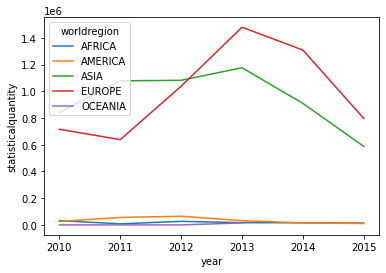

In [13]:
# Plot a line graph to illustrate the trend in the quantity of imports per region
sns.lineplot(data=total_imports, x = 'year', y='statisticalquantity', hue = 'worldregion')

From the line graph above, Asia and Europe are importing a much larger quantity than the other regions. There is a steady increase in imports from Europe from 2011 to 2013, but after the year 2013 it gradually decreases. Imports from Asia decreased are at steadier rate than Europe from 2013, this is evident from the slope of the green line above.

<AxesSubplot:xlabel='year', ylabel='customsvalue'>

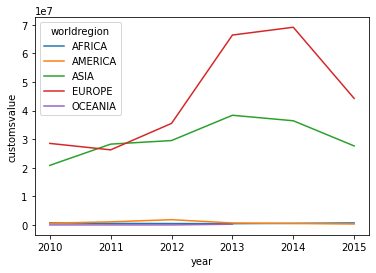

In [14]:
# Plot a line graph to illustrate the trend in the customs value of imports per region.
sns.lineplot(data=total_imports, x = 'year', y='customsvalue', hue = 'worldregion')

The line graph above indicates a much higher customs value for the chocolate imported from Europe than any other region. This is expected because Europe was exporting larger quantities of chocolate to South Africa. The high customs value maybe caused by the fact that more Rands are required in exchange for one Euro as opposed to one Yen. 

Analyse any trends regarding the the quantity of chocolate imported in a given month.

In [15]:
# Use groupby() the month of the year  
grouped_months = chocolate_df.groupby(['year', 'month'])

# Sum the statistical quantity for each month
imports_per_month = grouped_months.sum()

imports_per_month

transportcode  calendaryear  statisticalquantity  customsvalue
year month                                                                
2010 1                  9         20100             62075.13       2667070
     2                  9         32160            169902.98       5275837
     3                  9         22110            120186.59       3434057
     4                  9         24120            139106.01       4478377
     5                 15         40200            101409.46       2990544
...                   ...           ...                  ...           ...
2015 4                 26         26195            169279.17       8508428
     5                 21         22165            135899.52       5886178
     6                 44         40300            195980.20      10143829
     7                 32         30225            137126.43       6811254
     8                 27         30225            215474.57      11811526

[67 rows x 4 columns]

<AxesSubplot:xlabel='month', ylabel='statisticalquantity'>

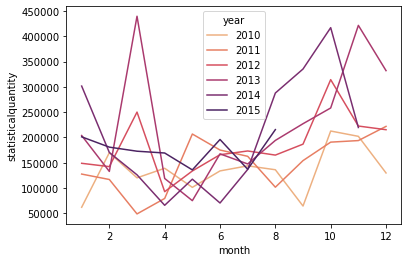

In [16]:
# Plot a line graph with the months on the x axis, the statistical quantity of the y-axis and 
# differentiate each line with a different year.

sns.lineplot(data=imports_per_month, x='month', y='statisticalquantity', hue ='year', palette='flare')

There are high quantities of chocolate imports between February and March after which a harsh decrease occurs. the quantity of imports steadily increase again after August and peaks in October. 
Let's have a closer look at each month of 2010 to 2015 using bar graphs.

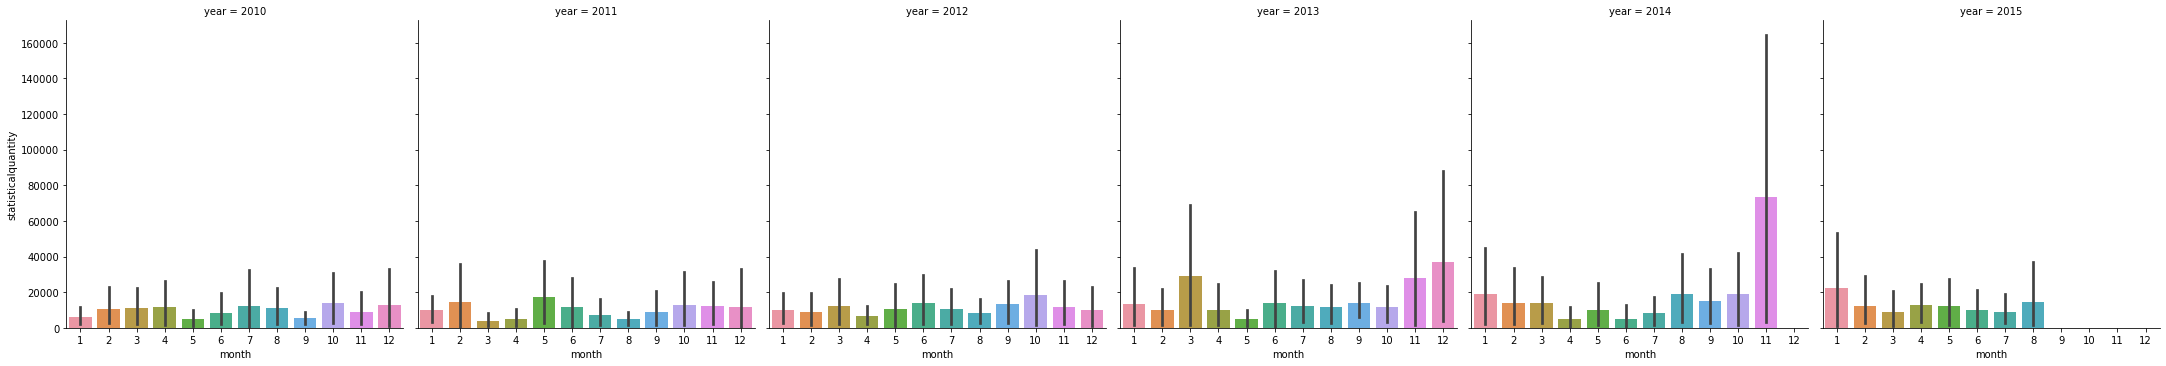

In [24]:
# Explore any trends for statistical quantity during the months of the year
sns.catplot(x = 'month', y = 'statisticalquantity', kind='bar', col ='year', data = chocolate_df)

# Show the plot
plt.show()

Let's visualise the trend in the mode of transportation that each region used to export to South Africa over the years.

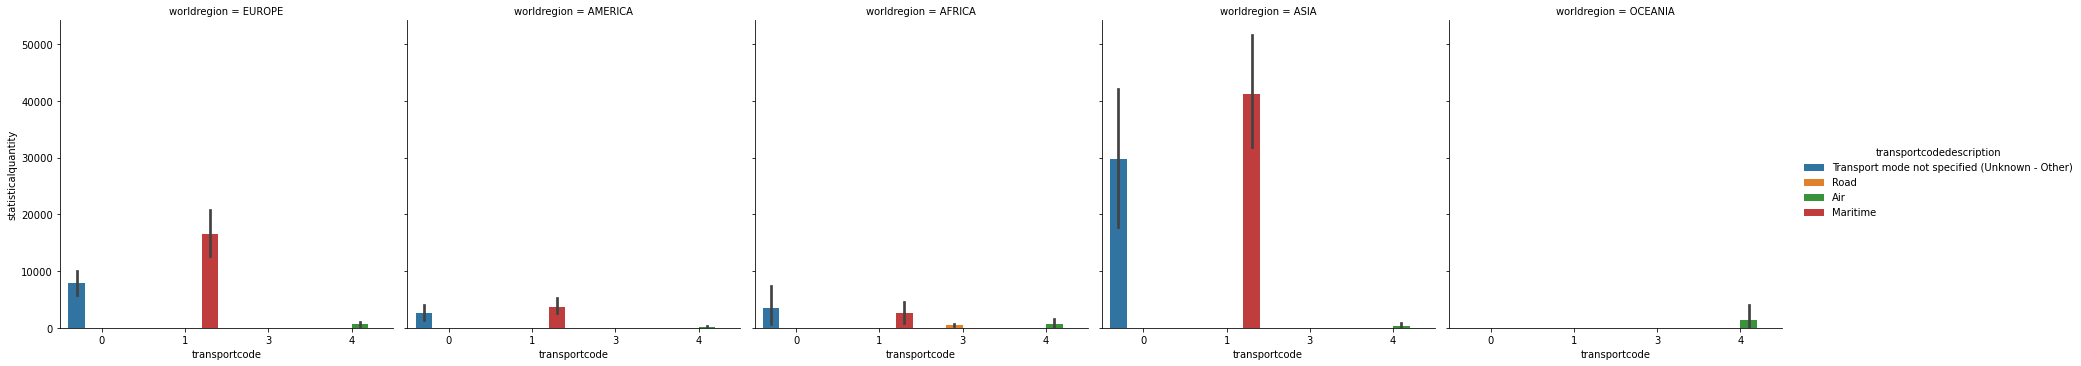

In [26]:
# plot multiple bar plots 
sns.catplot(data=chocolate_df, x='transportcode', y = 'statisticalquantity', col ='worldregion', 
            hue = 'transportcodedescription', kind = 'bar')

# show the graph
plt.show()

Lets take a closer look at the different countries in each region and the quanity exported. Use the groupby() method to group the worldregions and countryoforiginname.

In [19]:
grouped_countries = chocolate_df.groupby(['worldregion', 'countryoforiginname'])

country_imports = grouped_countries.sum()

country_imports

transportcode  calendaryear  \
worldregion countryoforiginname                                 
AFRICA      Botswana                        111         88517   
            Congo                             1          2013   
            Egypt                            23         16106   
            Kenya                             0          2010   
            Lesotho                         162        108640   
            Madagascar                        0          2011   
            Namibia                          33         22118   
            South Africa                      6          6037   
            Swaziland                       102         68452   
            Unclassified                      9          6042   
            Zimbabwe                          0          2010   
AMERICA     Argentina                         3          8047   
            Brazil                           36         70422   
            Canada                            4          4023   
            Chile                             4          2015   
            United States                   116         92585   
ASIA        China                            12         32196   
            Hong Kong                         8          4024   
            India                             7          8054   
            Indonesia                        15         12075   
            Iran                              1          2014   
            Israel                            9         18112   
            Japan                            12         10060   
            Lebanon                           4          4021   
            Malaysia                         24         44284   
            Pakistan                          5         10056   
            Saudi Arabia                      5         10055   
            Singapore                        76        144890   
            South Korea                       8          4023   
            Sri Lanka                         4          2015   
            Taiwan                            5         10066   
            Turkey                           19         36204   
            United Arab Emirates             41         22139   
EUROPE      Austria                           5          4024   
            Belgium                         196        275703   
            Bulgaria                          0          2010   
            Czech Republic                    4          2014   
            Denmark                           8          4025   
            France                          104         94587   
            Germany                          37         54342   
            Hungary                           6          6038   
            Ireland                          10         14081   
            Italy                           110        132815   
            Netherlands                      27         54325   
            Poland                           38         70456   
            Portugal                          5         10075   
            Spain                            37         54348   
            Switzerland                     107        227345   
            United Kingdom                  104        106644   
OCEANIA     Australia                        12          8046   
            New Zealand                      32         16097   

                                  statisticalquantity  customsvalue    year  \
worldregion countryoforiginname                                               
AFRICA      Botswana                         51059.05       1737133   88517   
            Congo                             1200.00         87181    2013   
            Egypt                            12511.90        274017   16106   
            Kenya                             9842.00         74939    2010   
            Lesotho                           5206.79        192018  108640   
            Madagascar             

The bar graphs below will indicate which countries in Asia and Europe export more chocolate than others.

countryoforiginname
China                     43765.64
Hong Kong                    22.50
India                     24356.25
Indonesia                 25468.00
Iran                      15081.00
Israel                     7725.57
Japan                         1.56
Lebanon                     383.00
Malaysia                 240659.52
Pakistan                   9300.50
Saudi Arabia                206.52
Singapore               5204224.53
South Korea                   2.35
Sri Lanka                    77.50
Taiwan                      507.19
Turkey                   101682.73
United Arab Emirates       1093.28
Name: statisticalquantity, dtype: float64


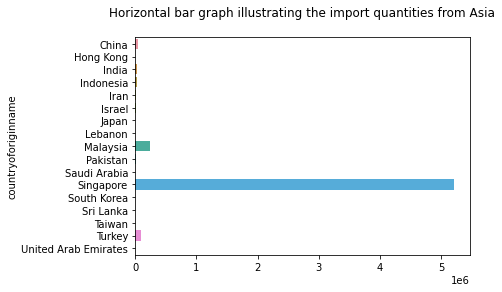

In [20]:
# Extract all the asian countries
# Use loc() to extract the asian countries and iloc
# to extract all 17 countries and the respectiive statitstical quantity.
asia_imports_series = country_imports.loc['ASIA'].iloc[:17,2]

print(asia_imports_series)


sns.barplot(y=asia_imports_series.index, x=asia_imports_series.values).set(title='Horizontal bar graph illustrating the import quantities from Asia\n')
plt.show()

Singapore exports the most chocolate compared to other Asian countries.

Let's have a closer look at the European region and the different countries that export chocolate to South Africa.

countryoforiginname
Austria             16477.06
Belgium           4566719.85
Bulgaria               19.20
Czech Republic         20.67
Denmark                 7.00
France              67051.40
Germany             30185.13
Hungary             27759.00
Ireland             38138.92
Italy              254434.74
Netherlands         40287.54
Poland             257259.70
Portugal            64496.40
Spain               67041.60
Switzerland        415687.14
United Kingdom     130243.94
Name: statisticalquantity, dtype: float64


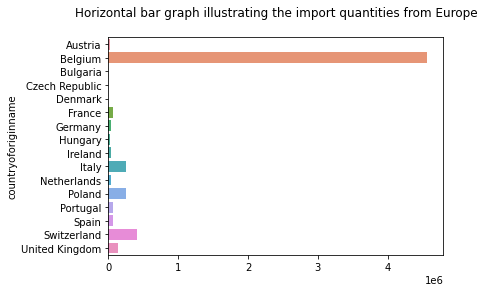

In [21]:
europe_imports_series = country_imports.loc['EUROPE'].iloc[:16,2]

print(europe_imports_series)


sns.barplot(y=europe_imports_series.index, x=europe_imports_series.values).set(title='Horizontal bar graph illustrating the import quantities from Europe\n')
plt.show()

Belgium exports the largest quantity of chocolate in Europe followed by Swtzerland, Italy and Poland. There are more countries exporting chocolate in Europe than in Asia. 

Group the statistical quantity of chocolate by the district office name to view which areas in South Africa recieve the most imports. 

In [22]:
grouped_ports = chocolate_df.groupby(['districtofficename'])

port_imports = grouped_ports.sum()

port_imports

,transportcode,calendaryear,statisticalquantity,customsvalue,year,month
districtofficename,,,,,,
Beit Bridge,0,2010,4000.00,116000,2010,10
Bloemfontein,8,4024,22.50,934,4024,3
Border Gate,3,2011,48.00,1923,2011,3
Caledonspoort,3,2015,1.00,9,2015,6
Cape Town,110,313916,637014.02,32483756,313916,1002
Cape Town Int Airport,224,142869,14066.79,1402740,142869,460
Durban,251,662088,10443306.15,391359278,662088,2089
Ficksburg Bridge,48,32175,1644.00,37359,32175,87
Germiston/Alberton,3,24136,244507.28,7213934,24136,72


The top three areas where chocolate imports are recieved are Durban, Cape Town and Johannesburg. Durban recieves the highest imports probable becuase it is closest to Asia which I saw is exports the largest quantity of chocolate.

References

https://eriikcasstro.medium.com/eda-for-time-series-b2ea7b36c65a#:~:text=EDA%20for%20time%20series%20is%20realtively%20short%2C%20however,%28as%20it%20can%20be%20done%20in%20this%20example%29.

https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f

https://seaborn.pydata.org/generated/seaborn.lineplot.html

https://python-graph-gallery.com/242-area-chart-and-faceting

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html